In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import get_data as gd
import compare_data as cd
import linear_regression as lr

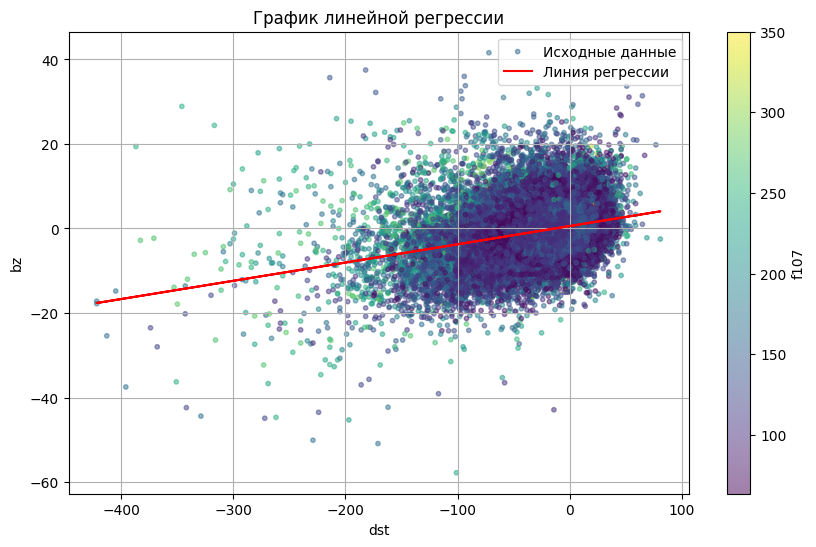

In [6]:
start_date = datetime.datetime(1970, 1, 1)
end_date = datetime.datetime(2022, 6, 30)

initial_data = gd.get_data(start_date, end_date)
initial_data = gd.transform_data(initial_data)
first_values = initial_data[0].dst
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()


# Применяем маску для фильтрации данных на основе значений bz
mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

# Рассчитываем линию регрессии
regression_line = lr.linear_regression(first_values, second_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)

# Добавление линии регрессии
plt.plot(first_values, regression_line, color='red', label='Линия регрессии')

plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу

# Графики
# plt.scatter(first_values, second_values, color='blue', label='Исходные данные', s=10)
# plt.plot(first_values, regression_line, color='red', label='Линия регрессии')


plt.grid(True)
plt.xlabel('dst')
plt.ylabel('bz')
plt.title('График линейной регрессии')
plt.legend()
plt.show()